
# Project: Investigate a Dataset (TMDB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

>This project will be analyzing the TMDB movie data Dataset from Kaggle. I will be interested in  analyzing trends in the movie industry such as which genres are more popluar, whether a higher budget necessarily implies more revenue among others.
>Questions about the Dataset<
>Does the runtime of a movie affect its popularity?
>Are higher budget movies more popular?
>What is the relationship between movie runtime and average votes?

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning (drop unnecessary records and modify the data)

In [6]:
# Drop extraneous variables
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'overview','genres', 'keywords', 'director','production_companies', 'release_date', 'release_year'], axis =1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,1.747999e+08,1.385749e+09


From the above data, in relation to my research questions, in terms of movie runtime and popularity, runtime is a dependent variable while popularity is an independent variable. In relation to budget and popularity, movie budget is a dependent variable and popularity an independent variable. In relation to movie runtime and votes, runtime is a dependent while votes are independent variables. In conclusion, based on the data I am preparing to analyze, dependent variables include: Runtime and Budget while independent variables include popularity and vote average.

In [7]:
#Check for duplicated rows
df.duplicated().sum()

1

In [8]:
#Remove duplicates since they are not useful for data analysis
df.drop_duplicates(inplace = True)

In [9]:
#Recheck data for duplicates
df.duplicated().sum()

0

In [10]:
#View missing values count
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
vote_count        0
vote_average      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
#look at the samples in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   vote_count      10865 non-null  int64  
 6   vote_average    10865 non-null  float64
 7   budget_adj      10865 non-null  float64
 8   revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 848.8+ KB


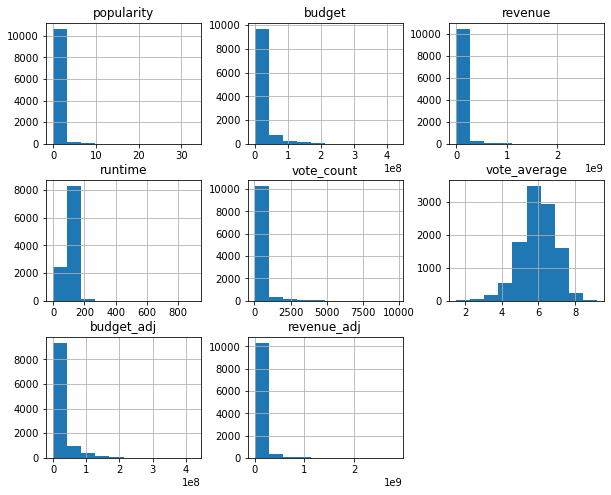

In [12]:
#get a visual glance at the overall data
df.hist(figsize=(10,8));

By using the isnull() function, we see that our data has no missing values.

<a id='eda'></a>
## Exploratory Data Analysis

Here I compute statistics and create visualizaions with the goal of addressing the research questions posed in the Introduction section. 

### Research Question 1 (Does the runtime of a movie affect its popularity?)

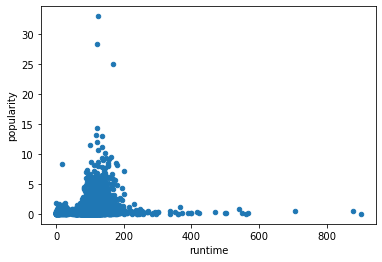

In [13]:
df.plot (x= 'runtime', y= 'popularity', kind = 'scatter');

Movies with a high tuntime are less popular in contrast to those with a much lower runtime. On average viewers prefer movies with a runtime of less than 200 minutes. This shows that inorder to produce a hit movie, the runtime should be in the 150-200 minutes range. Any higher than than will result to reduced popularity of the movie.

### Research Question 2  (Are higher budget movies more popular?)

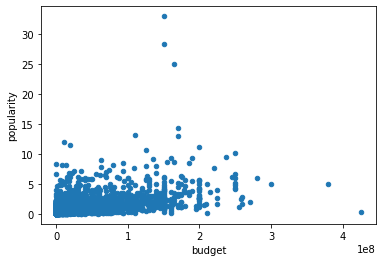

In [14]:
df.plot (x= 'budget', y= 'popularity', kind = 'scatter');

Films with lower budgets score high on the popularity scale. A low budget film has a high chance of gaining popularity with the audience. The film companies should focus less on their movie budgets if they want to gain the popularity vote.

### Research Question 3  (What is the relationship between movie runtime and votes?)

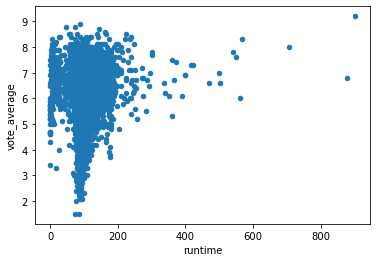

In [15]:
df.plot (x= 'runtime', y= 'vote_average', kind = 'scatter');

Low runtime movies seem to be rated highly on the voting average scale. The majority of low runtime movies have been rated highly on the vote average scale.

<a id='conclusions'></a>
## Conclusions
This section represents my conclusions on the Data. I have used the query function to compare the variables with the median and derive a conclusion that concurs with the respective research question.

### Research Question 1 Conclusion  (Does movie runtime affect its popularity?)

In [16]:
#median runtime
df['runtime'].median()

99.0

In [17]:
#samples with runtime less than median
low_runtime = df.query('runtime < 99.0')
#samples with runtime more than median
high_runtime = df.query('runtime >= 99.0')

num_samples = df.shape[0]
num_samples == low_runtime['popularity'].count() + high_runtime['popularity'].count()

True

In [18]:
#mean popularity for low runtime and high runtime
low_runtime.popularity.mean()

0.47040899721293084

In [19]:
high_runtime.popularity.mean()

0.8192394183840966

Movies with a 99 minute runtime are 81% more popular within this demographic.

### Research Question 2 Conclusion  (Does popularity of a movie have an effect on its budget?)

In [20]:
#median popularity
df['popularity'].median()

0.383831

In [21]:
#samples with popularity less than median
low_popularity = df.query('popularity < 0.3838555')
#samples with popularity more than median
high_popularity = df.query('popularity >= 0.3838555')

num_samples = df.shape[0]
num_samples == low_popularity['budget'].count() + high_popularity['budget'].count()

True

In [22]:
#mean budget for low popularity and high popularity
low_popularity.budget.mean()

3425910.8562488495

In [23]:
high_popularity.budget.mean()

25824722.828976437

Movies within the median range have a high budget. High budget movies are consumed by around 38% of viewers making low budget movies a much higher priority.

### Research Question 3 Conclusion  (What is the relationship between movie runtime and votes?)

In [24]:
#Get median runtime
df['runtime'].median()

99.0

In [25]:
#samples with runtime less than median
low_runtime = df.query('runtime < 99.0')
#samples with runtime more than median
high_runtime = df.query('runtime >= 99.0')

num_samples = df.shape[0]
num_samples == low_runtime['vote_average'].count() + high_runtime['vote_average'].count()

True

In [26]:
#mean vote average for low runtime and high runtime
low_runtime.vote_average.mean()

5.741434410999616

In [27]:
high_runtime.vote_average.mean()

6.2042859748312855

Movies with a 99 minute runtime are 6.2 times more likely to recieve a better rating from critics than those which are not within that runtime frame.

Limitation

The analysis is limited to only the variables presented within the dataset. Our analysis lacks specification in terms of currency denomination on revenue hence limiting how we can make deductions based on a global scale.